#  Assignment-13-KNN-Zoo

In [15]:
# Import liabraries
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
# Import dataset
zoo=pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
# Data filtering
X= zoo.iloc[:, 1:17]
Y= zoo.iloc[:,17]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [12]:
def get_standardized_val(data):
    zoo_norm=(data-data.min())/(data.max()-data.min())
    return(zoo_norm)

In [14]:
X=get_standardized_val(X)
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


In [5]:
# Building the model

model= KNeighborsClassifier(n_neighbors=5)
model.fit(X,Y)

KNeighborsClassifier()

In [17]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
#Since the class 5 has just 4 data points hence we keep the n_splits as 3

kfold=KFold(n_splits=3)
kfold

KFold(n_splits=3, random_state=None, shuffle=False)

In [7]:
cvs=cross_val_score(model,X.values,Y,cv=kfold)

In [23]:
print(cvs.mean())

0.9096850861556743


In [8]:
# Checking model on 2 random datapoints

predict_val=zoo.iloc[99:101,1:17]
predict_val

model.predict(predict_val)

C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([7, 2], dtype=int64)

In [9]:
zoo.iloc[99:101,17]

99     7
100    2
Name: type, dtype: int64

In [17]:
# Finding optimal number of neighbours

optimal_neighbors = [2*i+1 for i in range(0,10)]
cvsl =[]
for size in optimal_neighbors:
    model=KNeighborsClassifier(n_neighbors=size)
    model.fit(X,Y)
    cvs=cross_val_score(model,X,Y,cv=3)
    print("no of neighbors: "+str(size)+"     Average Score: "+str(cvs.mean()))
    cvsl.append(cvs.mean())

C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWa

no of neighbors: 1     Average Score: 0.9702911467617351
no of neighbors: 3     Average Score: 0.8805704099821746
no of neighbors: 5     Average Score: 0.8410576351752823
no of neighbors: 7     Average Score: 0.8113487819370171
no of neighbors: 9     Average Score: 0.7816399286987522
no of neighbors: 11     Average Score: 0.771538918597742
no of neighbors: 13     Average Score: 0.7816399286987522
no of neighbors: 15     Average Score: 0.7816399286987522
no of neighbors: 17     Average Score: 0.7424242424242425
no of neighbors: 19     Average Score: 0.7228163992869877


C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWa

(0.6, 1.2)

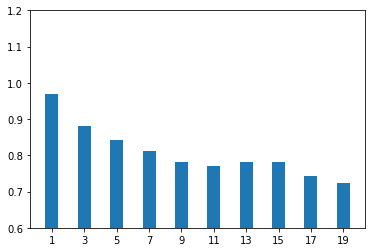

In [18]:
plt.bar(optimal_neighbors,cvsl)
plt.xticks(optimal_neighbors)
plt.ylim(0.6,1.2)

In [23]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X,Y)
cvs=cross_val_score(model,X,Y,cv=kfold)
cvs.mean()

C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9191919191919192

In [24]:
model.predict(predict_val)

C:\Users\ganes\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([7, 2], dtype=int64)

In [ ]:
# Even though 1 gives higher accuracy , we choose 3 as optimal number beacuse just considering 1 nearest neighbour is inadequate to reach a conclusion

# # Hence optimum number of neighbours is 3 with accuracy 0.9096 for KNN